In [3]:
from clustimage import Clustimage
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np

In [4]:
image_path = "C:/Users/marti/unsupervised-flower-image-segmentation/input/flower_images"
path = sorted([os.path.join(image_path, file) for file in os.listdir(image_path ) if file.endswith('.png')])
print(len(path))

210


In [5]:
# Etiquetas de las categorias extraida de la competencia de Kaggle.
labels_names = {
    0 : 'phlox', 
    1 : 'rose',
    2 : 'calendula',
    3 : 'iris',
    4 : 'leucanthemum',
    5 : 'campanula',
    6 : 'viola',
    7 : 'rudbeckia',
    8 : 'peony',
    9 : 'aquilegia'
}

labels = pd.read_csv('C:/Users/marti/unsupervised-flower-image-segmentation/input/flower_images/flower_labels.csv')
labels['names'] =labels['label'].map(labels_names)
labels

,file,label,names
0,0001.png,0,phlox
1,0002.png,0,phlox
2,0003.png,2,calendula
3,0004.png,0,phlox
4,0005.png,0,phlox
...,...,...,...
205,0206.png,6,viola
206,0207.png,0,phlox
207,0208.png,4,leucanthemum
208,0209.png,6,viola


In [6]:
labels['names'].value_counts(dropna=False)

names
peony           26
campanula       25
viola           23
iris            22
phlox           21
leucanthemum    21
rose            20
calendula       19
aquilegia       18
rudbeckia       15
Name: count, dtype: int64

### Color Space Conversions
https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
http://claudiovz.github.io/scipy-lecture-notes-ES/advanced/image_processing/index.html

A RGB image has 3 channels: red, green and blue.
A CMYK image has four channels: cyan, magenta, yellow, and black.


In [7]:
img = cv2.imread(path[15])
img.shape

(128, 128, 3)

(-0.5, 127.5, 127.5, -0.5)

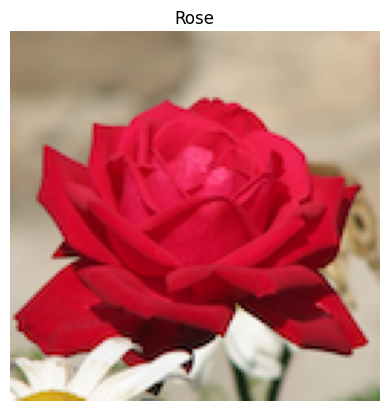

In [8]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

plt.imshow(imgRGB)
plt.title(labels['names'][15].capitalize())
plt.axis('off')
#cv2.imwrite('nueva_imagen.jpg', img)


(-0.5, 127.5, 127.5, -0.5)

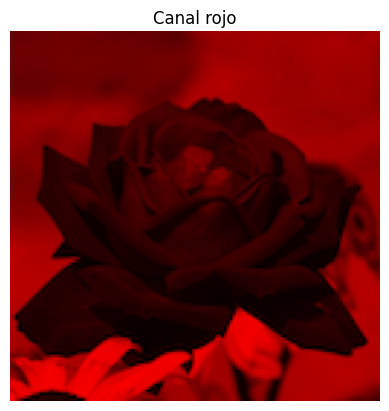

In [17]:
imagen = np.zeros_like(img)  # armo matriz con ceros
imagen[:, :, 0] = img[:, :, 0]  # selecciono los canales de a uno
plt.imshow(imagen)
plt.title("Canal rojo")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

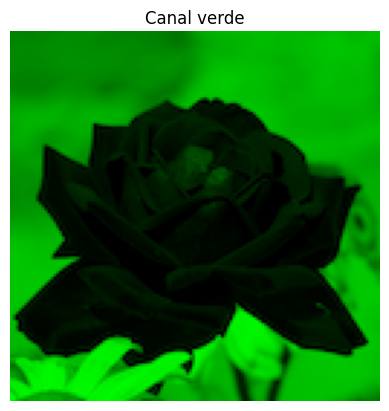

In [29]:
imagen = np.zeros_like(img)  # armo matriz con ceros
imagen[:, :, 1] = img[:, :, 1]  # selecciono los canales de a uno
plt.imshow(imagen)
plt.title("Canal verde")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

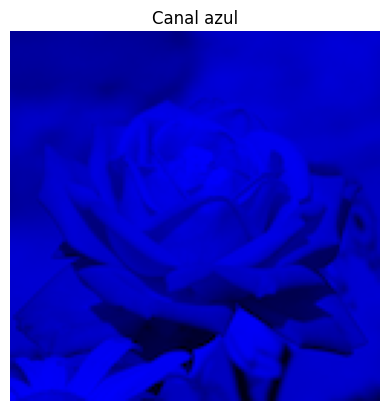

In [19]:
imagen = np.zeros_like(img)  # armo matriz con ceros
imagen[:, :, 2] = img[:, :, 2]  # selecciono los canales de a uno
plt.imshow(imagen)
plt.title("Canal azul")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

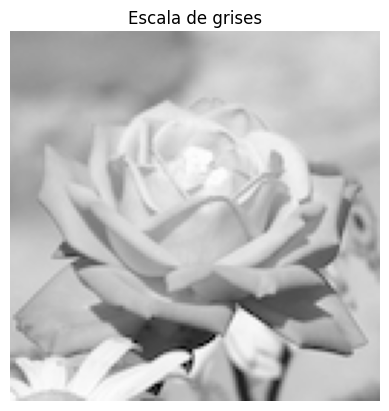

In [7]:
# Para que un pixel sea de una tonalidad gris, sus 3 niveles de RGB deben ser iguales. 
# Podemos promediarlos o utilizar otro metodo para obtener un unico valor para las tres capas de colores.

def escala_grises(nombre_imagen):
    matriz = np.array(img, dtype='int').tolist()
    ancho = len(matriz[0])
    alto = len(matriz)
    for y in range(alto):
        for x in range(ancho):
            pixel = matriz[y][x]
            # El doble / es para dividir y redondear a entero
            #unif_colors = (pixel[0] + pixel[1] + pixel[2])//3
            unif_colors = max(pixel[0], pixel[1], pixel[2])
            matriz[y][x][0] = unif_colors
            matriz[y][x][1] = unif_colors
            matriz[y][x][2] = unif_colors
    return matriz

imgGRAY = escala_grises(img)
plt.imshow(imgGRAY)
plt.title("Escala de grises")
plt.axis('off')

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

(-0.5, 127.5, 127.5, -0.5)

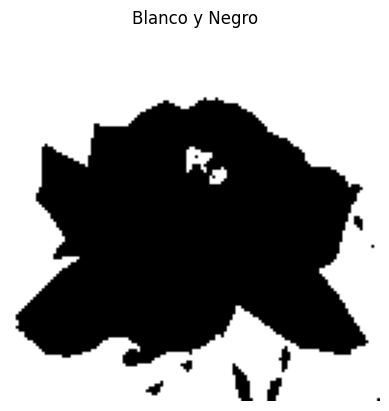

In [8]:
# define a threshold, 128 is the middle of black and white in grey scale
thresh = 100

# threshold the image
img_binary = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_binary,'gray',vmin=0,vmax=255)
plt.title("Blanco y Negro")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

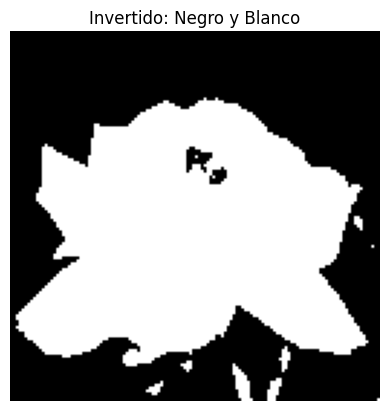

In [18]:
# threshold the image
img_binary = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), thresh, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(img_binary,'gray',vmin=0,vmax=255)
plt.title("Invertido: Negro y Blanco")
plt.axis('off')

The adaptiveMethod decides how the threshold value is calculated:
* cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
* cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

(-0.5, 127.5, 127.5, -0.5)

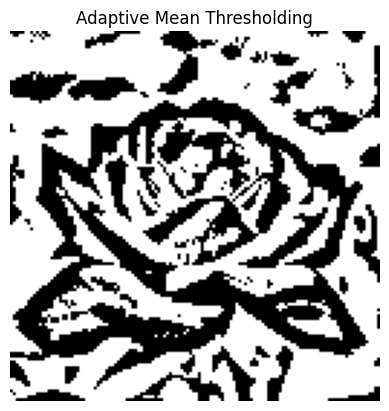

In [17]:
img_binary = cv2.adaptiveThreshold(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 255, 
                                   cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(img_binary,'gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

### Cambiar brillo y contraste de una imagen
* Brillo: El brillo se usa para aumentar o disminuir la oscuridad en una imagen para que podamos ajustar la visibilidad de los objetos. Cuando se ajusta el brillo, la gama completa de tonos dentro de la imagen aumenta o disminuye según corresponda.
* Contraste: El contraste se refiere a qué tan diferentes son los colores o los niveles de brillo en una imagen. Ajustar el contraste hace que los objetos de una imagen sean más claros. Un alto contraste significa una imagen más nítida y clara, similar a las fotos tomadas bajo la luz del sol. Mientras que el bajo contraste dificulta ver y distinguir los objetos, al igual que cuando hay niebla afuera. Cuando se sube el ajuste de contraste, se eliminan los tonos medios. La imagen tendrá un mayor porcentaje de tonos oscuros o blancos y negros o luces con un tono medio mínimo.
* Gamma: se refiere al atributo que controla la proporción de los colores RGB en una imagen. Junto con eso, también modifica el brillo de la imagen.

(-0.5, 127.5, 127.5, -0.5)

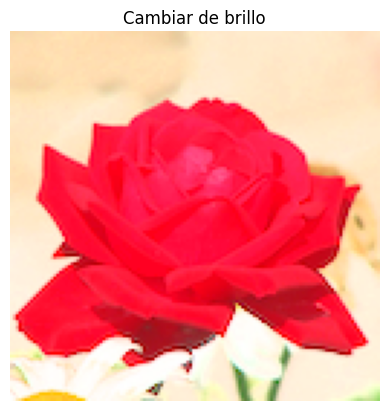

In [11]:
# El modelo HSV se utiliza para representar las gamas de colores del modelo RGB en forma cilíndrica. 
# HSV significa Hue, Saturation y Brightness (Value).El atributo Hue se usa para especificar el matiz del color 
# que se está usando, y el atributo Saturation determina la cantidad en la que se usa el color. El atributo Valor se 
# utiliza para especificar el brillo del color.
# Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]

def change_brightness(img, value=0):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

plt.imshow(change_brightness(imgRGB, value=+100))
plt.title("Cambiar de brillo")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

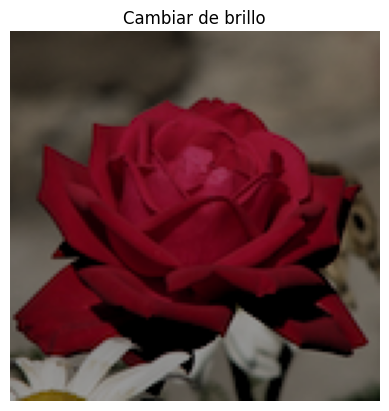

In [12]:
plt.imshow(change_brightness(imgRGB, value=-100))
plt.title("Cambiar de brillo")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

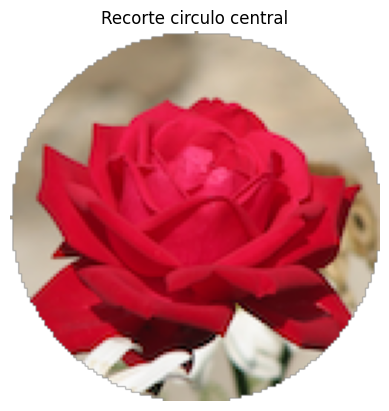

In [40]:
lx, ly = imgRGB.shape[0:2]
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
# Masks
slice_img = imgRGB.copy()
slice_img[mask] = 0

plt.imshow(slice_img)
plt.title("Recorte circulo central")
plt.axis('off')

(128, 128, 3)

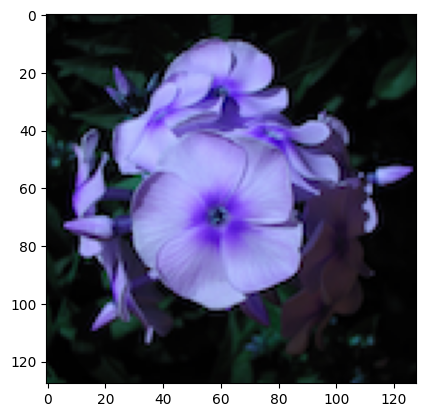

In [35]:
img_1 = cv2.imread(path[17])
plt.imshow(img_1)
img_1.shape

(128, 128, 3)

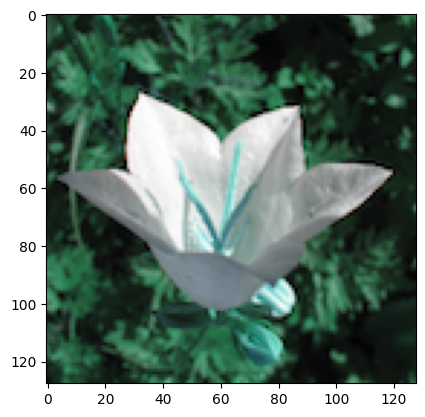

In [34]:
img_2 = cv2.imread(path[65])
plt.imshow(img_2)
img_2.shape

(-0.5, 127.5, 127.5, -0.5)

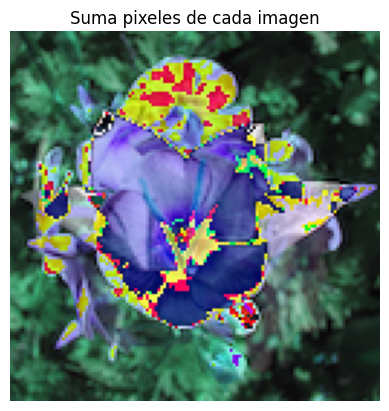

In [79]:
plt.imshow(img_1+img_2)
plt.title("Suma pixeles de cada imagen")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

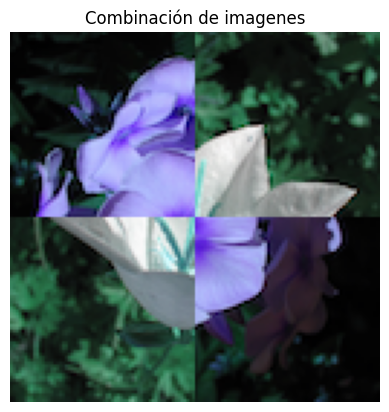

In [78]:
slice1 = img_1[0:64,0:64]
slice2 = img_2[64:128,0:64]
np.r_[slice1,slice2]

slice3 = img_2[0:64,64:128]
slice4 = img_1[64:128,64:128]
np.r_[slice3,slice4]

plt.imshow(np.r_[slice1,slice2])
plt.imshow(np.r_[slice3,slice4])

plt.imshow(np.hstack((np.r_[slice1,slice2],np.r_[slice3,slice4])))
plt.title("Combinación de imagenes")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

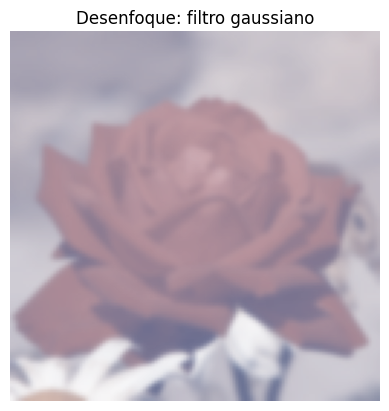

In [89]:
# Filtro gaussiano de scipy.ndimage

from scipy import misc
from scipy import ndimage
blurred_img = ndimage.gaussian_filter(imgRGB, sigma=1)
plt.imshow(blurred_img)
plt.title("Desenfoque: filtro gaussiano")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

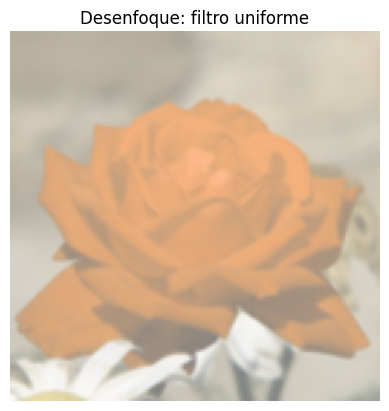

In [96]:
# Filtro uniforme

local_mean = ndimage.uniform_filter(imgRGB, size=2)
plt.imshow(local_mean)
plt.title("Desenfoque: filtro uniforme")
plt.axis('off')

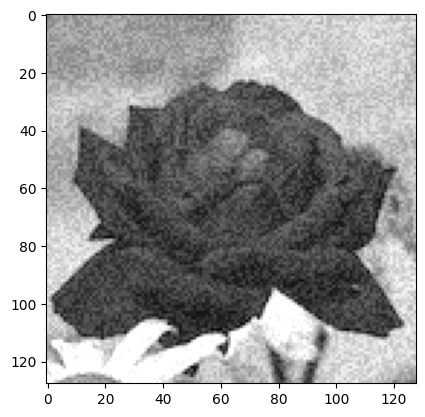

In [198]:
img_slice_ = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noisy = img_slice_ + 0.8*img_slice_.std()*np.random.random(img_slice_.shape)
plt.imshow(noisy,'gray', vmin=0, vmax=255)


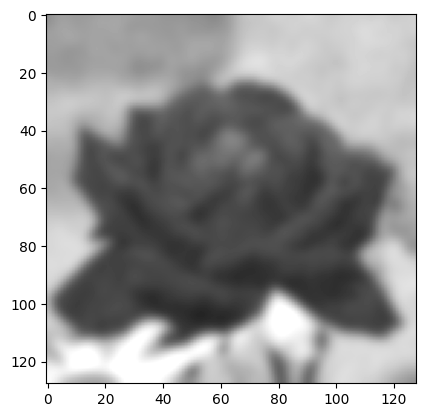

In [199]:
#Un filtro gaussiano suaviza la imagen eliminando el ruido... además de los bordes
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
plt.imshow(gauss_denoised,'gray',vmin=0, vmax=255)


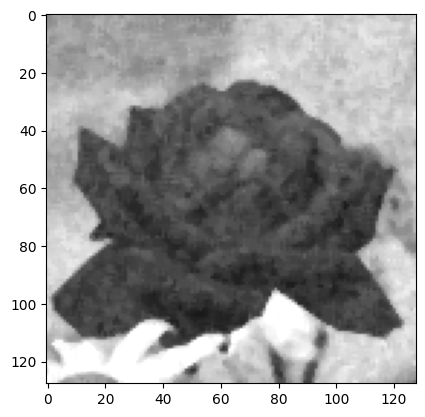

In [202]:
#Un filtro de mediana conserva mejor los bordes
med_denoised = ndimage.median_filter(noisy,3)
plt.imshow(med_denoised,'gray',vmin=0, vmax=255)